In [71]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error  

In [72]:
df = pd.read_csv("./CSM_dataset.csv")

df

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014.0,6.3,8.0,9130.0,4000000.0,45.0,1.0,0.0,3280543.0,4632.0,425.0,636.0,1120000.0
1,22 Jump Street,2014.0,7.1,1.0,192000000.0,50000000.0,3306.0,2.0,2.0,583289.0,3465.0,61.0,186.0,12350000.0
2,3 Days to Kill,2014.0,6.2,1.0,30700000.0,28000000.0,2872.0,1.0,0.0,304861.0,328.0,34.0,47.0,483000.0
3,300: Rise of an Empire,2014.0,6.3,1.0,106000000.0,110000000.0,3470.0,2.0,0.0,452917.0,2429.0,132.0,590.0,568000.0
4,A Haunted House 2,2014.0,4.7,8.0,17300000.0,3500000.0,2310.0,2.0,0.0,3145573.0,12163.0,610.0,1082.0,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Aloha,2015.0,5.5,15.0,21000000.0,37000000.0,2815.0,1.0,13.0,7119456.0,18803.0,1128.0,2290.0,NaN
228,Unfinished Business,2015.0,5.4,8.0,10200000.0,35000000.0,2777.0,1.0,7.0,3450614.0,6823.0,325.0,409.0,NaN
229,War Room,2015.0,5.4,1.0,12300000.0,3000000.0,NaN,1.0,10.0,66872.0,400.0,67.0,201.0,NaN
230,The Gallows,2015.0,4.4,15.0,22600000.0,100000.0,2720.0,1.0,-5.0,659772.0,2841.0,431.0,606.0,NaN


## Preprocessing

In [73]:
data = df.drop('Movie', axis=1)
movie = df['Movie']

data.columns = range(len(data.columns)) 

data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2014.0,6.3,8.0,9130.0,4000000.0,45.0,1.0,0.0,3280543.0,4632.0,425.0,636.0,1120000.0
1,2014.0,7.1,1.0,192000000.0,50000000.0,3306.0,2.0,2.0,583289.0,3465.0,61.0,186.0,12350000.0
2,2014.0,6.2,1.0,30700000.0,28000000.0,2872.0,1.0,0.0,304861.0,328.0,34.0,47.0,483000.0
3,2014.0,6.3,1.0,106000000.0,110000000.0,3470.0,2.0,0.0,452917.0,2429.0,132.0,590.0,568000.0
4,2014.0,4.7,8.0,17300000.0,3500000.0,2310.0,2.0,0.0,3145573.0,12163.0,610.0,1082.0,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2015.0,5.5,15.0,21000000.0,37000000.0,2815.0,1.0,13.0,7119456.0,18803.0,1128.0,2290.0,NaN
228,2015.0,5.4,8.0,10200000.0,35000000.0,2777.0,1.0,7.0,3450614.0,6823.0,325.0,409.0,NaN
229,2015.0,5.4,1.0,12300000.0,3000000.0,NaN,1.0,10.0,66872.0,400.0,67.0,201.0,NaN
230,2015.0,4.4,15.0,22600000.0,100000.0,2720.0,1.0,-5.0,659772.0,2841.0,431.0,606.0,NaN


## Filling NaN Values

In [74]:
cont_attr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

print("before: ", data.isna().sum())

for index in range(14):
    if index in cont_attr:
        _mean = data[index].mean()
        data[index] = data[index].replace(math.nan, _mean)
    
print("after: ", data.isna().sum()) 


before:  0      1
1      1
2      1
3      1
4      2
5     11
6      1
7      1
8      1
9      1
10     1
11     1
12    36
dtype: int64
after:  0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64


## Normalization

In [75]:
min_max_scaler = MinMaxScaler()
X = data[cont_attr].values
X_scaled = min_max_scaler.fit_transform(X)

normalized = pd.DataFrame(X_scaled, columns=[cont_attr], index=data.index)
data[cont_attr] = normalized

data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.571429,0.500000,0.000010,0.015724,0.009949,0.000000,0.567164,0.100528,0.012498,0.030444,0.016578,0.036061
1,0.000000,0.714286,0.000000,0.298598,0.199776,0.764461,0.166667,0.597015,0.017857,0.009348,0.004370,0.004848,0.397981
2,0.000000,0.553571,0.000000,0.047741,0.111751,0.664044,0.000000,0.567164,0.009323,0.000882,0.002436,0.001225,0.015532
3,0.000000,0.571429,0.000000,0.164849,0.439843,0.802406,0.166667,0.567164,0.013861,0.006552,0.009456,0.015379,0.018271
4,0.000000,0.285714,0.500000,0.026901,0.013724,0.534012,0.166667,0.567164,0.096391,0.032821,0.043696,0.028204,0.061966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1.000000,0.428571,1.000000,0.032656,0.147761,0.650856,0.000000,0.761194,0.218192,0.050741,0.080802,0.059693,0.097880
228,1.000000,0.410714,0.500000,0.015859,0.139759,0.642064,0.000000,0.671642,0.105741,0.018410,0.023281,0.010661,0.097880
229,1.000000,0.410714,0.000000,0.019125,0.011723,0.510700,0.000000,0.716418,0.002028,0.001077,0.004799,0.005239,0.097880
230,1.000000,0.232143,1.000000,0.035144,0.000120,0.628876,0.000000,0.492537,0.020201,0.007664,0.030874,0.015796,0.097880


## Train/Test

In [76]:
Y = np.array(data.pop(3))
X = np.array(data)
print(X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_test.shape, X_train.shape)

X

(232, 12) (232,)
(47, 12) (185, 12)


array([[0.        , 0.57142857, 0.5       , ..., 0.03044413, 0.01657847,
        0.03606099],
       [0.        , 0.71428571, 0.        , ..., 0.00436963, 0.00484842,
        0.39798125],
       [0.        , 0.55357143, 0.        , ..., 0.00243553, 0.00122514,
        0.01553176],
       ...,
       [1.        , 0.41071429, 0.        , ..., 0.00479943, 0.00523942,
        0.0978805 ],
       [1.        , 0.23214286, 1.        , ..., 0.03087393, 0.01579647,
        0.0978805 ],
       [0.29437229, 0.59670686, 0.3113791 , ..., 0.04864269, 0.04759016,
        0.0978805 ]])

## Gradient Descent Regression 

In [99]:
lr_gd = SGDRegressor()
lr_gd.fit(X_train, Y_train)
score = lr_gd.score(X_test, Y_test)

print(score)

0.30740903056136126


In [78]:
list_of_scores = []

for index in range(1000, 2000):
    _lr_gd = SGDRegressor(max_iter=index)
    _lr_gd.fit(X_train, Y_train)
    score = _lr_gd.score(X_test, Y_test)
    list_of_scores.append(score)
    

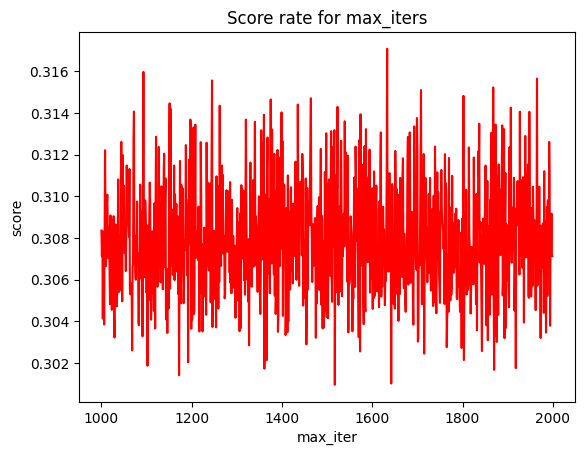

In [79]:
plt.plot(list(range(1000, 2000)), list_of_scores, color="red")
plt.xlabel("max_iter")
plt.ylabel("score")
plt.title("Score rate for max_iters")
plt.show()

In [80]:
scores = np.array(list_of_scores)
index_max = np.argmax(scores) + 1000

print(index_max)

1633


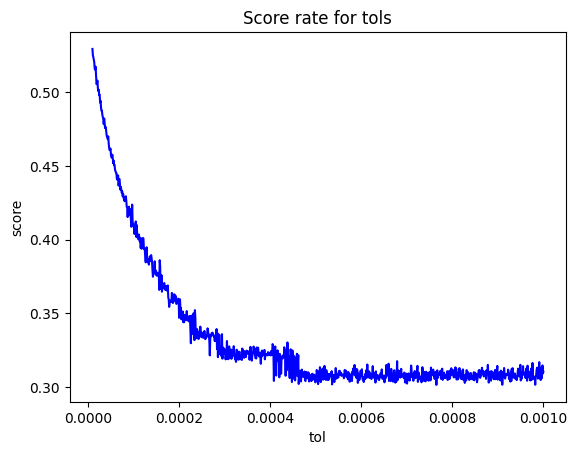

In [98]:
loop_range = np.linspace(0.00001, 0.001, 1000)  

list_of_scores = []

for index in loop_range:  
    _lr_gd = SGDRegressor(tol=index)
    _lr_gd.fit(X_train, Y_train)
    score = _lr_gd.score(X_test, Y_test)
    list_of_scores.append(score)
    
plt.plot(list(np.linspace(0.00001, 0.001, 1000)), list_of_scores, color="blue")
plt.xlabel("tol")
plt.ylabel("score")
plt.title("Score rate for tols")
plt.show()

In [106]:
lr_gd = SGDRegressor(max_iter=1700, tol=0.00001)
lr_gd.fit(X_train, Y_train)
score = lr_gd.score(X_test, Y_test)

print(score)

0.5310921379787438


## MSE

In [109]:
Y_pred = lr_gd.predict(X_test)  
mse = mean_squared_error(Y_test, Y_pred)  

mse

0.008620314882899665